In [1]:
import json
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
import random


Stanford Question Answering Dataset (SQuAD) is a reading comprehension dataset, consisting of questions posed by crowdworkers on a set of Wikipedia articles, where the answer to every question is a segment of text, or span, from the corresponding reading passage, or the question might be unanswerable.

**SQuAD V1**

In [2]:
with open('squad-dev-v1.1.json') as json_file:  
    data = json.load(json_file)
data = pd.DataFrame.from_dict(data)
df = pd.DataFrame.from_dict(data['data'])

In [3]:
# Number of Titles
len(df['data'])

48

In [39]:
#print(title_df[title_df['Titles']=='Force'])
#print(title_df[title_df['Titles']=='American_Broadcasting_Company'])
#df['data'][47]['paragraphs'][0]
#df['data'][24]['paragraphs'][0]

**Math/Science/Medicine/Technology**: Prime_number, Pharmacy, Chloroplast, Ctenophora, Oxygen, Immune_system, Geology, Packet_switching, Computational_complexity_theory, Apollo_program, Force, Construction

**Society/Law/Government**: European_Union_law, Intergovernmental_Panel_on_Climate_Change, Scottish_Parliament, Imperialism, Economic_inequality

**People/Pop Culture/Entities**: Nikola_Tesla, Doctor_Who, Martin_Luther, Genghis_Khan, Teacher, American_Broadcasting_Company, Harvard_University, Private_school, University_of_Chicago, Super_Bowl_50

**History**: Civil_disobedience, French_and_Indian_War, Kenya, Black_Death, Yuan_dynasty, 1973_oil_crisis, Steam_engine, Normans, Apollo_program

**Religion**: United_Methodist_Church, Islamism, Huguenot

**Places**: Fresno,_California, Jacksonville,_Florida, Victoria_(Australia), Sky_(United_Kingdom), Southern_California, Amazon_rainforest, Newcastle_upon_Tyne, Warsaw, Victoria_and_Albert_Museum, Rhine


In [ ]:
line1 = df['data'][0]
line2 = df['data'][1]
line1

In [5]:
# First and second title
print(line1['title'])
print(line2['title'])

Super_Bowl_50
Warsaw


In [6]:
# Number of paragraphs for Super_Bowl_50
print(len(line1['paragraphs']))
# Number of paragraphs for Warsaw
print(len(line2['paragraphs']))

54
49


In [36]:
# Each paragraph consists of "context" which is the text and question-answer pairs
line1['paragraphs'][0].keys()

dict_keys(['context', 'qas'])

In [7]:
# The first passage for Superbowl has 30 QA pairs
print(len(line1['paragraphs'][0]['qas']))
# The first passage for Warsaw has 5 QA pairs
print(len(line2['paragraphs'][0]['qas']))

30
5


In [40]:
# answer_start is counted by characters 
line1['paragraphs'][0]['qas'][0]

{'answers': [{'answer_start': 177, 'text': 'Denver Broncos'},
  {'answer_start': 177, 'text': 'Denver Broncos'},
  {'answer_start': 177, 'text': 'Denver Broncos'}],
 'question': 'Which NFL team represented the AFC at Super Bowl 50?',
 'id': '56be4db0acb8001400a502ec'}

In [48]:
line1['paragraphs'][0]['context'][177]

'D'

**Context by Title**

In [3]:
paragraph_count = []
ch_avg =[]
wc_avg = []
list_of_titles = []
# for each topic
for i in range(48):
    sum_ch = 0
    sum_wc = 0
    avg_ch = 0
    avg_wc = 0
    #print('Topic: ' + str(df['data'][i]['title']))
    list_of_titles.append(df['data'][i]['title'])
    paragraph_count.append(len(df['data'][i]['paragraphs']))
    # for each paragraph
    for j in range(len(df['data'][i]['paragraphs'])):
        sum_ch+=len(df['data'][i]['paragraphs'][j]['context'])
        sum_wc+=len(df['data'][i]['paragraphs'][j]['context'].split())
    avg_ch = sum_ch/len(df['data'][i]['paragraphs'])
    avg_wc = sum_wc/len(df['data'][i]['paragraphs'])
    #print('Average length for ' + str(df['data'][i]['title']) + ': ' + str(avg_ch))
    ch_avg.append(int(avg_ch))
    wc_avg.append(int(avg_wc))


In [4]:
title_df  = pd.DataFrame({'Titles': list_of_titles, 'Avg characters': ch_avg, 'Avg # of words': wc_avg,\
                          'Paragraph Count': paragraph_count})

In [33]:
title_df = title_df.sort_values('Paragraph Count', ascending=False)
# Top 5 titles with highest avg # of words
title_df.head(5)

,Titles,Avg characters,Avg # of words,Paragraph Count
24,American_Broadcasting_Company,870,139,98
6,Martin_Luther,680,112,98
3,Nikola_Tesla,538,87,92
34,Doctor_Who,812,133,64
39,Chloroplast,713,104,63


/Users/joannahuang/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Text(0.5, 1.0, 'Number of Paragraphs by Title')

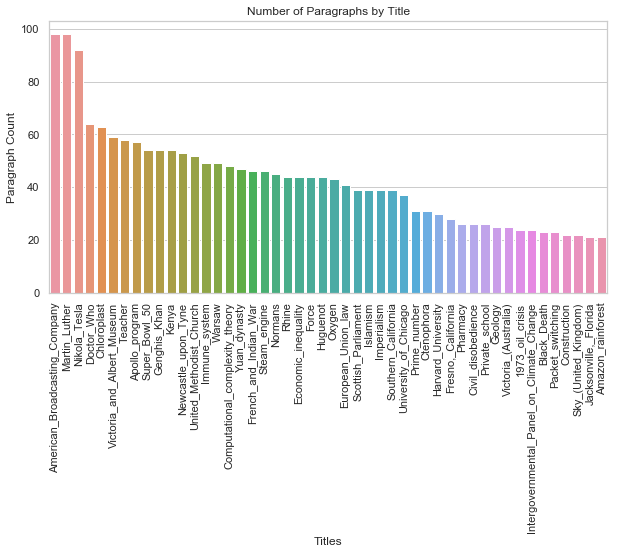

In [34]:
sns.set(style="whitegrid")
#fig, ax =plt.subplots(ncols=3, figsize=(20, 5))
fig, ax =plt.subplots(figsize=(10, 5))
plot1 = sns.barplot(x="Titles", y="Paragraph Count", data=title_df)
#plot1 = sns.barplot(x="Titles", y="Paragraph Count", data=title_df, ax=ax[0])
#plot2 = sns.barplot(x="Titles", y="Avg characters", data=title_df, ax=ax[1])
#plot3 = sns.barplot(x="Titles", y="Avg # of words", data=title_df, ax=ax[2])
fig.show()
loc, labels = plt.xticks()
plot1.set_xticklabels(labels, rotation=90)
plot1.set_title('Number of Paragraphs by Title')
#plot2.set_xticklabels(labels, rotation=90)
#plot3.set_xticklabels(labels, rotation=90)

- Number of paragraphs for each title ranges from 21 to 98, with average at 43 paragraphs. Title with smallest number of paragraphs are 'Jacksonville,_Florida' and 'Amazon_rainforest' , and with highest are 'American_Broadcasting_Company' and 'Martin_Luther.'
- Average character and average word count are directly related. Average character counts range from 491 to 1,714 characters with an average of 782 characters and average word count range from 75 to 271 with an average of 123 words.
- Title(s) with lowest number of average characters: Southern_California/ Title(s) with highest number of average characters: European_Union_law
- Title(s) with lowest number of average word count: / Southern_California Title(s) with highest number of average word count: European_Union_law

In [22]:
#title_df[title_df['Titles']=='European_Union_law']
European_Union_law = df['data'][15]
SoCal = df['data'][7]
print('\033[1m' + str(European_Union_law['title']))
print('\033[0m'+ 'Sample Passage:')
print(European_Union_law['paragraphs'][0]['context'])
print('\n')
print(European_Union_law['paragraphs'][30]['context'])
print('\n' + '\033[1m' + str(SoCal['title']))
print('\033[0m'+ 'Sample Passage:')
print(SoCal['paragraphs'][0]['context'])
print('\n')
print(SoCal['paragraphs'][30]['context'])

European_Union_law
Sample Passage:
European Union law is a body of treaties and legislation, such as Regulations and Directives, which have direct effect or indirect effect on the laws of European Union member states. The three sources of European Union law are primary law, secondary law and supplementary law. The main sources of primary law are the Treaties establishing the European Union. Secondary sources include regulations and directives which are based on the Treaties. The legislature of the European Union is principally composed of the European Parliament and the Council of the European Union, which under the Treaties may establish secondary law to pursue the objective set out in the Treaties.


While the concept of a "social market economy" was only introduced into EU law in 2007, free movement and trade were central to European development since the Treaty of Rome 1957. According to the standard theory of comparative advantage, two countries can both benefit from trade even if

**Questions by Title**

In [7]:
ch_avg =[]
wc_avg = []
WH_count = []
NonWH_count = []
total_count=[]
NonWH_questions = []
list_of_titles = []
# for each topic
for i in range(48):
    sum_ch = 0
    sum_wc = 0
    avg_ch = 0
    avg_wc = 0
    WH_qs = 0
    nonWH_qs = 0
    nonWH = []
    total_qs = 0
    list_avgs_wc = []
    list_avgs_ch = []
    list_of_titles.append(df['data'][i]['title'])
    #print(df['data'][i]['title'])
    # for each paragraph
    for j in range(len(df['data'][i]['paragraphs'])):
        q_count = 0
        sum_ch = 0
        sum_wc = 0
        for k in range(len(df['data'][i]['paragraphs'][j]['qas'])):
            q_count+=1
            q = df['data'][i]['paragraphs'][j]['qas'][k]['question'].lower()
            #print(len(q.split()))
            sum_ch+=len(q)
            sum_wc+=len(q.split())
            if "which"in q or "who" in q or "what" in q or "where"in q or "when" in q or "why" in q or "how" in q:
                WH_qs+=1
            else:
                nonWH_qs+=1
                #print(q)
                nonWH.append(q)
        list_avgs_wc.append((sum_wc,q_count))
        list_avgs_ch.append((sum_ch,q_count))
    word_sum_wc =0
    question_sum_wc=0
    word_sum_ch =0
    question_sum_ch=0
    for i in range(len(list_avgs_wc)):
        word_sum_wc += list_avgs_wc[i][0]
        question_sum_wc +=list_avgs_wc[i][1]
        word_sum_ch += list_avgs_ch[i][0]
        question_sum_ch +=list_avgs_ch[i][1]
    total_qs = WH_qs+nonWH_qs
    #print('Average length for ' + str(df['data'][i]['title']) + ': ' + str(avg_ch))
    ch_avg.append(int(word_sum_ch/question_sum_ch))
    wc_avg.append(int(word_sum_wc/question_sum_wc))
    WH_count.append(int(WH_qs))
    NonWH_count.append(int(nonWH_qs))
    total_count.append(int(total_qs))
    NonWH_questions.append(nonWH)
        



In [8]:
q_df  = pd.DataFrame({'Titles': list_of_titles, 'Avg characters': ch_avg, 'Avg # of words': wc_avg,\
                          'WH_count': WH_count, 'NonWH_count': NonWH_count, 'Total': total_count, 'NonWH Qs': NonWH_questions})
q_df.head()
q_df = q_df.sort_values('Total', ascending=False)

/Users/joannahuang/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Text(0.5, 1.0, 'Total Questions by Title')

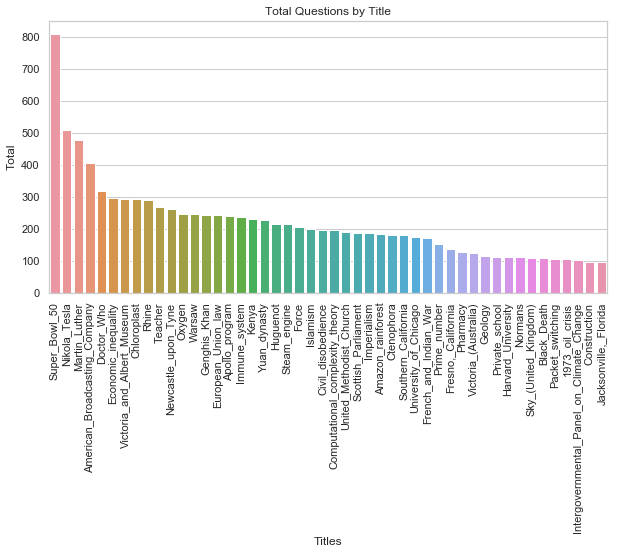

In [30]:
sns.set(style="whitegrid")
#fig, ax =plt.subplots(ncols=3, figsize=(20, 5))
fig, ax =plt.subplots(figsize=(10, 5))
plot1 = sns.barplot(x="Titles", y="Total", data=q_df)
#plot1 = sns.barplot(x="Titles", y="Total", data=q_df, ax=ax[0])
#plot2 = sns.barplot(x="Titles", y="WH_count", data=q_df, ax=ax[1])
#plot3 = sns.barplot(x="Titles", y="NonWH_count", data=q_df, ax=ax[2])
fig.show()
loc, labels = plt.xticks()
plot1.set_xticklabels(labels, rotation=90)
plot1.set_title('Total Questions by Title')
#plot2.set_xticklabels(labels, rotation=90)
#plot3.set_xticklabels(labels, rotation=90)

- Number of questions for each title ranges from 96 to 810, with average at 220 questions, median at 197. Title with smallest number of questions is 'Jacksonville,_Florida' , and with highest is Super_Bowl_50.
- Number of WH questions for each title ranges from 96 to 808. Most questions are WH questions.
- Number of NON WH questions for each title ranges from 0 to 11, with average of 1. Title with 11 Non WH Questions is Oxygen. 
- Average question length ranges from minimum of 6 words to max of 14, 35 characters to max of 88 characters.

In [55]:
print(len(SuperBowl['paragraphs']))

54


In [90]:
#title_df[title_df['Titles']=='Jacksonville,_Florida']
#print(len(Jacksonville_Florida['paragraphs'])) 21 Jacksonville passages
#print(len(SuperBowl['paragraphs'])) 54 Super Bowl passages
Jacksonville_Florida = df['data'][32]
SuperBowl = df['data'][0]
print('\033[1m' + str(Jacksonville_Florida['title']))
print('\033[0m'+ 'Sample Question:')
print(Jacksonville_Florida['paragraphs'][0]['qas'][0]['question'])
print(Jacksonville_Florida['paragraphs'][0]['qas'][4]['question'])
print(Jacksonville_Florida['paragraphs'][5]['qas'][4]['question'])
print(Jacksonville_Florida['paragraphs'][10]['qas'][4]['question'])
print(Jacksonville_Florida['paragraphs'][20]['qas'][0]['question'])
print('\n' + '\033[1m' + str(SuperBowl['title']))
print('\033[0m'+ 'Sample Question:')
print(SuperBowl['paragraphs'][0]['qas'][0]['question'])
print(SuperBowl['paragraphs'][7]['qas'][2]['question'])
print(SuperBowl['paragraphs'][30]['qas'][0]['question'])
print(SuperBowl['paragraphs'][40]['qas'][5]['question'])
print(SuperBowl['paragraphs'][50]['qas'][1]['question'])


Jacksonville,_Florida
Sample Question:
Which Florida city has the biggest population?
What year did consolidation cause Jacksonville to become part of Duval County?
When was the Jacksonville town charter approved?
Jacksonville began to suffer and decline after what major world event?
What portion of households in Jacksonville have only one person?

Super_Bowl_50
Sample Question:
Which NFL team represented the AFC at Super Bowl 50?
When did Lev's Stadium open?
What percentage of money raised by the Host Committee will be used for charitable causes?
Who handled the play-by-play for the Denver radio stations?
Graham Gano kicked a field goal of how many yards?


In [94]:
list(q_df[q_df['Titles']=='Oxygen']['NonWH Qs'])

[['the atomic number of the periodic table for oxygen?',
  'are atmospheric oxygen levels going up, down, or staying the same?',
  'oxygen is released in cellular respiration by?',
  '_____ helps the biospher from uv.',
  'the symbol for mercuric oxide is?',
  'philo of byzantium ____ surmised that air converted to fire',
  'although not a fuel  ___ is the chemical compound the generates the most occurrence of explosions.',
  '______ in both liquid and gas form can fastly result in an exlposion.',
  'to ensure safety of future space missions oxygen was used at _____ of the normal pressure.',
  'to reduce the chances of combustion ___ is required for safely handeling pure o.',
  "silicates of magnesium and iron make up of the earth's ___"]]

In [95]:
list(q_df[q_df['Titles']=='Amazon_rainforest']['NonWH Qs'])

[['did the rainforest managed to thrive during the glacial periods? ']]

**Answers by Title**

In [14]:
len(df['data'][0]['paragraphs'][32]['qas'][9]['answers'])

3

In [20]:
ch_avg =[]
wc_avg = []
total_count=[]
list_of_titles = []
answer_avg = []
# for each topic
for i in range(48):
    sum_ch = 0
    sum_wc = 0
    total_ans = 0
    list_avgs_wc = []
    list_avgs_ch = []
    answer_lengths = []
    list_of_titles.append(df['data'][i]['title'])
    #print(df['data'][i]['title'])
    # for each paragraph
    for j in range(len(df['data'][i]['paragraphs'])):
        for k in range(len(df['data'][i]['paragraphs'][j]['qas'])):
            #q_count+=1
            max_wc = 0
            min_wc = 0
            answer_lengths.append(len(df['data'][i]['paragraphs'][j]['qas'][k]['answers']))
            #print(df['data'][i]['paragraphs'][j]['qas'][k]['answers'])
            #print(answer_lengths)
            #q = df['data'][i]['paragraphs'][j]['qas'][k]['question'].lower()
            for l in range(len(df['data'][i]['paragraphs'][j]['qas'][k]['answers'])):
                #print(df['data'][i]['paragraphs'][j]['qas'][k]['answers'])
                a = df['data'][i]['paragraphs'][j]['qas'][k]['answers'][l]['text']
                #print(a)
                #print(len(a.split()))
                if l != len(df['data'][i]['paragraphs'][j]['qas'][k]['answers'])-1:
                    a2 = df['data'][i]['paragraphs'][j]['qas'][k]['answers'][l+1]['text']
                    if (len(a.split()) > len(a2.split()) or len(a.split()) == len(a2.split())):
                        max_wc=len(a.split( ))
                        min_wc = len(a2.split( ))
                    else:
                        max_wc=len(a2.split( ))
                        min_wc = len(a.split( ))
            #print('max: ' + str(max_wc))   
            #print('min: ' + str(min_wc))  
            #print((max_wc+min_wc)/2)
            list_avgs_wc.append((max_wc+min_wc)/2)
    wc_avg.append((sum(list_avgs_wc)/len(list_avgs_wc)))
    answer_avg.append(sum(answer_lengths)/len(answer_lengths))

        



In [21]:
a_df  = pd.DataFrame({'Titles': list_of_titles, 'Avg # of words': wc_avg, 'Avg # of answers': answer_avg})
a_df.head()
a_df = a_df.sort_values('Avg # of words', ascending=False)

/Users/joannahuang/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Text(0.5, 1.0, 'Avg Answer Length by Title')

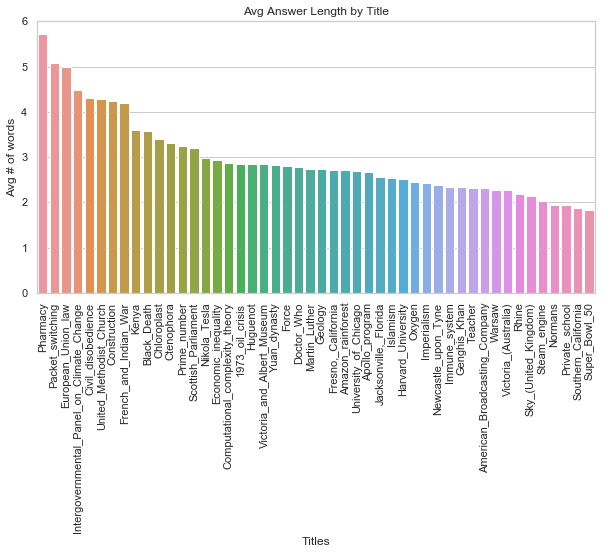

In [31]:
sns.set(style="whitegrid")
fig, ax =plt.subplots(figsize=(10, 5))
plot1 = sns.barplot(x="Titles", y="Avg # of words", data=a_df)
fig.show()
loc, labels = plt.xticks()
plot1.set_xticklabels(labels, rotation=90)
plot1.set_title('Avg Answer Length by Title')


/Users/joannahuang/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


[Text(0, 0, 'Pharmacy'),
 Text(0, 0, 'Packet_switching'),
 Text(0, 0, 'European_Union_law'),
 Text(0, 0, 'Intergovernmental_Panel_on_Climate_Change'),
 Text(0, 0, 'Civil_disobedience'),
 Text(0, 0, 'United_Methodist_Church'),
 Text(0, 0, 'Construction'),
 Text(0, 0, 'French_and_Indian_War'),
 Text(0, 0, 'Kenya'),
 Text(0, 0, 'Black_Death'),
 Text(0, 0, 'Chloroplast'),
 Text(0, 0, 'Ctenophora'),
 Text(0, 0, 'Prime_number'),
 Text(0, 0, 'Scottish_Parliament'),
 Text(0, 0, 'Nikola_Tesla'),
 Text(0, 0, 'Economic_inequality'),
 Text(0, 0, 'Computational_complexity_theory'),
 Text(0, 0, '1973_oil_crisis'),
 Text(0, 0, 'Huguenot'),
 Text(0, 0, 'Victoria_and_Albert_Museum'),
 Text(0, 0, 'Yuan_dynasty'),
 Text(0, 0, 'Force'),
 Text(0, 0, 'Doctor_Who'),
 Text(0, 0, 'Martin_Luther'),
 Text(0, 0, 'Geology'),
 Text(0, 0, 'Fresno,_California'),
 Text(0, 0, 'Amazon_rainforest'),
 Text(0, 0, 'University_of_Chicago'),
 Text(0, 0, 'Apollo_program'),
 Text(0, 0, 'Jacksonville,_Florida'),
 Text(0, 0, 'Isl

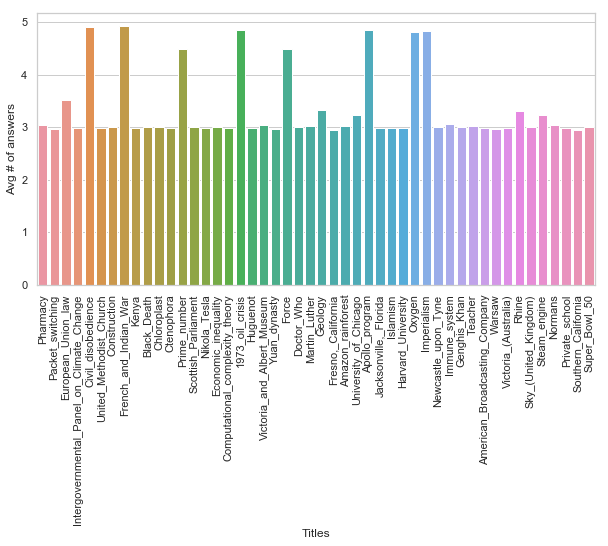

In [23]:
sns.set(style="whitegrid")
fig, ax =plt.subplots(figsize=(10, 5))
plot1 = sns.barplot(x="Titles", y="Avg # of answers", data=a_df)
fig.show()
loc, labels = plt.xticks()
plot1.set_xticklabels(labels, rotation=90)


In [24]:
a_df['Avg # of answers'].describe()

count    48.000000
mean      3.326507
std       0.664289
min       2.944444
25%       2.987330
50%       3.001684
75%       3.234078
max       4.924419
Name: Avg # of answers, dtype: float64

- Average number of words in an answer is around 3 with minimum of 1 and max of 5.
- Average number of answers per title is around 3 with minimum of 2 and max of 4.

In [116]:
print('Topics with shortest answers')
print(a_df[a_df['Avg # of words']<2])
print('Topics with longest answers')
print(a_df[a_df['Avg # of words']>5])

Topics with shortest answers
                 Titles  Avg # of words
2   Normans              1.950893      
30  Private_school       1.942478      
7   Southern_California  1.883333      
0   Super_Bowl_50        1.841975      
Topics with longest answers
              Titles  Avg # of words
26  Pharmacy          5.717054      
19  Packet_switching  5.084906      


In [125]:
#title_df[title_df['Titles']=="Pharmacy"]
#Private_school = df['data'][30]
#Normans = data['data'][2]
print('\033[1m' + 'Sample of Short Answers\n' + str(SoCal['title']))
print('\033[0m'+ 'Sample Question/Answer:')
print('\033[1m' + str(SoCal['paragraphs'][1]['qas'][0]['question']))
print('\033[0m'+ str(SoCal['paragraphs'][1]['qas'][0]['answers']))
print('\033[1m' + str(SoCal['paragraphs'][10]['qas'][0]['question']))
print('\033[0m'+ str(SoCal['paragraphs'][10]['qas'][0]['answers']))
print('\033[1m\n' + str(SuperBowl['title']))
print('\033[0m'+ 'Sample Question/Answer:')
print('\033[1m' + str(SuperBowl['paragraphs'][1]['qas'][0]['question']))
print('\033[0m'+ str(SuperBowl['paragraphs'][1]['qas'][0]['answers']))
print('\033[1m' + str(SuperBowl['paragraphs'][20]['qas'][0]['question']))
print('\033[0m'+ str(SuperBowl['paragraphs'][20]['qas'][0]['answers']))


Sample of Short Answers
Southern_California
Sample Question/Answer:
What is the name of the region that is not defined by the eight or 10 county definitions?
[{'answer_start': 62, 'text': 'Southern California Megaregion'}, {'answer_start': 50, 'text': 'the greater Southern California Megaregion'}, {'answer_start': 62, 'text': 'Southern California Megaregion'}]
Which country used to rule California?
[{'answer_start': 136, 'text': 'Mexico'}, {'answer_start': 136, 'text': 'Mexico'}, {'answer_start': 136, 'text': 'Mexico'}]

Super_Bowl_50
Sample Question/Answer:
Which Carolina Panthers player was named Most Valuable Player?
[{'answer_start': 77, 'text': 'Cam Newton'}, {'answer_start': 77, 'text': 'Cam Newton'}, {'answer_start': 77, 'text': 'Cam Newton'}]
In what Super Bowl did Rivera play?
[{'answer_start': 63, 'text': 'Super Bowl XX'}, {'answer_start': 63, 'text': 'Super Bowl XX'}, {'answer_start': 74, 'text': 'XX'}]


In [121]:
#title_df[title_df['Titles']=="Pharmacy"]
Pharm = df['data'][26]
Packet = data['data'][19]
print('\033[1m' + 'Sample of Long Answers\n' + str(Pharm['title']))
print('\033[0m'+ 'Sample Question/Answer:')
print('\033[1m' + str(Pharm['paragraphs'][1]['qas'][0]['question']))
print('\033[0m'+ str(Pharm['paragraphs'][1]['qas'][0]['answers']))
print('\033[1m' + str(Pharm['paragraphs'][10]['qas'][0]['question']))
print('\033[0m'+ str(Pharm['paragraphs'][10]['qas'][0]['answers']))
print('\033[1m\n' + str(Packet['title']))
print('\033[0m'+ 'Sample Question/Answer:')
print('\033[1m' + str(Packet['paragraphs'][1]['qas'][0]['question']))
print('\033[0m'+ str(Packet['paragraphs'][1]['qas'][0]['answers']))
print('\033[1m' + str(Packet['paragraphs'][15]['qas'][0]['question']))
print('\033[0m'+ str(Packet['paragraphs'][15]['qas'][0]['answers']))


Sample of Long Answers
Pharmacy
Sample Question/Answer:
What type of professionals are pharmacists?
[{'answer_start': 16, 'text': 'healthcare professionals'}, {'answer_start': 16, 'text': 'healthcare'}, {'answer_start': 16, 'text': 'healthcare professionals with specialised education'}]
What do the services given by pharmacists provide?
[{'answer_start': 54, 'text': 'optimizes the use of medication and promotes health, wellness, and disease prevention'}, {'answer_start': 54, 'text': 'optimizes the use of medication and promotes health, wellness, and disease prevention'}, {'answer_start': 20, 'text': 'direct patient care services that optimizes the use of medication and promotes health, wellness, and disease prevention'}]

Packet_switching
Sample Question/Answer:
Packet Switching contrast with what other principal 
[{'answer_start': 71, 'text': 'circuit switching'}, {'answer_start': 71, 'text': 'circuit switching'}, {'answer_start': 71, 'text': 'circuit switching'}]
What was Tymnet
[{'a

In [350]:
line1['paragraphs'][1]['context']

'The Panthers finished the regular season with a 15–1 record, and quarterback Cam Newton was named the NFL Most Valuable Player (MVP). They defeated the Arizona Cardinals 49–15 in the NFC Championship Game and advanced to their second Super Bowl appearance since the franchise was founded in 1995. The Broncos finished the regular season with a 12–4 record, and denied the New England Patriots a chance to defend their title from Super Bowl XLIX by defeating them 20–18 in the AFC Championship Game. They joined the Patriots, Dallas Cowboys, and Pittsburgh Steelers as one of four teams that have made eight appearances in the Super Bowl.'

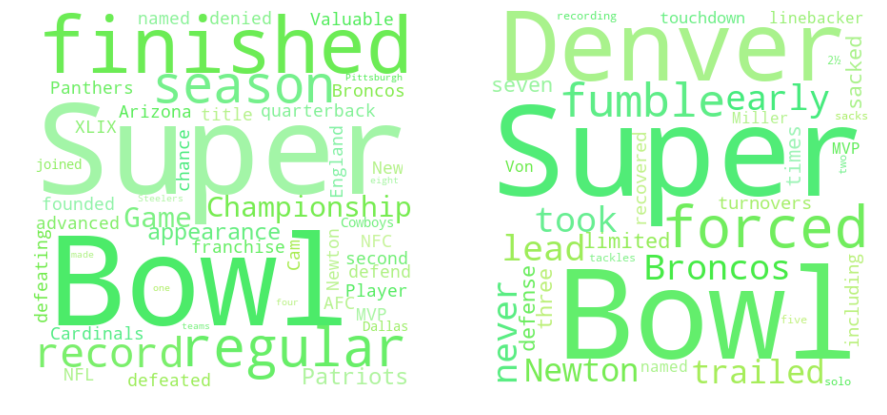

In [9]:
def red_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(0, 35), random.randint(60, 80))
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 8])
wordcloud1 = wordcloud.WordCloud(background_color='white', height=400).generate(line1['paragraphs'][1]['context'])
wordcloud2 = wordcloud.WordCloud(background_color='white', height=400).generate(line1['paragraphs'][2]['context'])
ax1.imshow(wordcloud1.recolor(color_func=green_color, random_state=3),interpolation="bilinear")
ax1.axis('off');
ax2.imshow(wordcloud2.recolor(color_func=green_color, random_state=3),interpolation="bilinear")
ax2.axis('off');


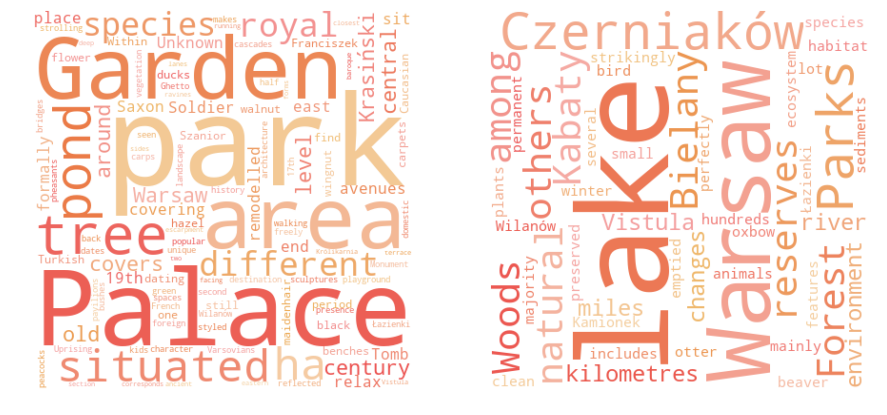

In [10]:
def red_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(0, 35), random.randint(60, 80))
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 8])
wordcloud1 = wordcloud.WordCloud(background_color='white', height=400).generate(line2['paragraphs'][1]['context'])
wordcloud2 = wordcloud.WordCloud(background_color='white', height=400).generate(line2['paragraphs'][2]['context'])
ax1.imshow(wordcloud1.recolor(color_func=red_color, random_state=3),interpolation="bilinear")
ax1.axis('off');
ax2.imshow(wordcloud2.recolor(color_func=red_color, random_state=3),interpolation="bilinear")
ax2.axis('off');
